<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/Simple_model_for_hsyteresis_1attempt_Feb_2023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [87]:
'cd', '/content/drive/My Drive/'

('cd', '/content/drive/My Drive/')

In [88]:
import pandas as pd

In [89]:
#df =pd.read_excel('/My Drive/training data.xlsx')
df =pd.read_excel('/content/drive/My Drive/Data/training data.xlsx')


In [90]:

df.head()

,x,y
0,-0.016479,0.012032
1,-0.016479,0.014321
2,-0.016174,0.012338
3,-0.014038,0.013406
4,0.001526,0.012338


In [92]:
df.loc[: , 'x']

0      -0.016479
1      -0.016479
2      -0.016174
3      -0.014038
4       0.001526
          ...   
2427    0.033569
2428    0.024719
2429    0.014954
2430    0.009155
2431    0.001831
Name: x, Length: 2432, dtype: float64

In [91]:
df.loc[: , 'y']

0       0.012032
1       0.014321
2       0.012338
3       0.013406
4       0.012338
          ...   
2427    0.016152
2428    0.015237
2429    0.013253
2430    0.014932
2431    0.011422
Name: y, Length: 2432, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2432 non-null   float64
 1   y       2432 non-null   float64
dtypes: float64(2)
memory usage: 38.1 KB


In [ ]:
df.describe()

,x,y
count,2432.000000,2432.000000
mean,2.819206,0.084886
std,2.092661,0.051935
min,-0.016785,0.010507
25%,0.766525,0.034272
50%,2.736053,0.083062
75%,4.652863,0.127580
max,7.001038,0.191934


In [ ]:
df['x'].isnull().values.any()

False

In [ ]:
df['y'].isnull().values.any()

False

In [ ]:
df.shape

(2432, 2)

In [ ]:
!pip uninstall matplotlib.pyplot

In [93]:
!pip install matplotlib==3.1.3

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import C

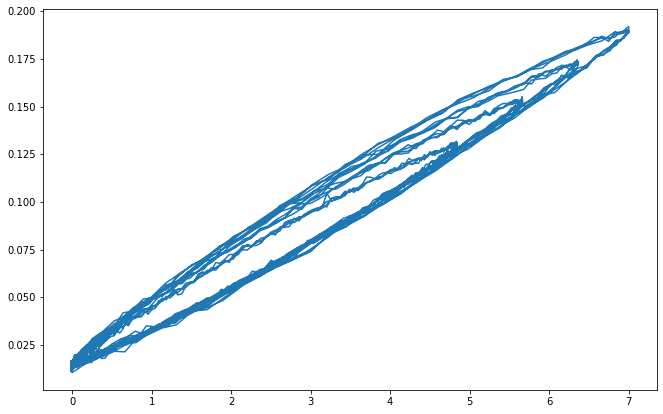

In [94]:
import numpy as np
#import matplotlib.pyplot as plt
train_x = np.array(df['x'])
train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
plt.plot(train_x, train_y)
#plt.plot(val_x, val_y)

plt.show()

In [95]:
x=df['x']

In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
x.shape

(2432,)

In [ ]:
df.index

RangeIndex(start=0, stop=2432, step=1)

In [ ]:
x.dtype

dtype('float64')

In [ ]:
df=df.drop_duplicates()

In [96]:
y=df['y']

In [ ]:
y.shape

(2423,)

In [ ]:
y.dtype

dtype('float64')

In [ ]:
df=df.drop_duplicates()

In [102]:
import scipy as sp
#import scipy.signal
import os
import numpy as np

In [97]:
import scipy as sp
import scipy.signal
import os
import numpy as np
#import matplotlib.pyplot as plt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-4b7f7d67af79>", line 2, in <module>
    import scipy.signal
  File "/usr/local/lib/python3.8/dist-packages/scipy/signal/__init__.py", line 292, in <module>
    from . import sigtools, windows
  File "/usr/local/lib/python3.8/dist-packages/scipy/signal/windows/__init__.py", line 41, in <module>
    from .windows import *
  File "/usr/local/lib/python3.8/dist-packages/scipy/signal/windows/windows.py", line 7, in <module>
    from scipy import linalg, special, fft as sp_fft
  File "/usr/local/lib/python3.8/dist-packages/scipy/fft/__init__.py", line 84, in <module>
    from ._basic import (
  File "/usr/local/lib/python3.8/dist-packages/scipy/fft/_basic.py", line 1, in <module>
    from scipy._lib.uarray import generate_multimethod, Dispatchable
  File "/usr/local/lib/pytho

OSError: ignored

In [103]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    
    return out

In [104]:
train_x = np.array(df['x'])
train_y=np.array(df['y'])

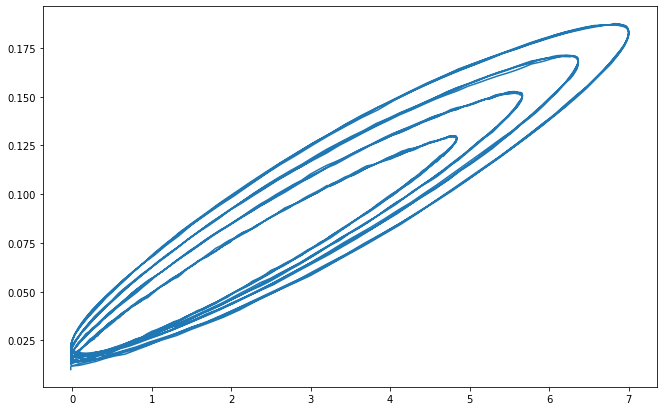

In [105]:
import numpy as np
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

In [ ]:
train_x.shape


(2423,)

In [ ]:
train_y.shape


(2423,)

In [ ]:
len= train_x

In [ ]:
train_x = np.array(x)
train_y = ewma_vectorized(np.array(y), 11)

The above same task is performed in bellow emntion cells and that is for validation data 

In [ ]:
data=pd.read_excel('/content/drive/My Drive/data/val.xlsx')

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt

a=data['a']
b=data['b']
plt.plot(a,b, color="r")

In [ ]:
import scipy as sp
import scipy.signal
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ewma_vectorized(data, window):
    alpha = 2 /(window + 1.0)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    
    return out

In [ ]:
a=data['a']
b=data['b']
train_x = np.array(x)
train_y = ewma_vectorized(np.array(y),11)
x_val= np.array(a)
y_val = ewma_vectorized(np.array(b), 11)



In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(train_x, train_y)
plt.plot(x_val, y_val)

plt.show()

In [ ]:
plt.plot(train_x,train_y)

In [ ]:
plt.plot(x_val,y_val, color = 'orange')

In [ ]:
plt.plot(x,y)

# Parameter Estimation Algo Through **Recursive least square algo** through the link "https://github.com/AleksandarHaber/Disciplined-Python-Implementation-of-the-Recursive-Least-Squares-Method" and video details are "https://www.youtube.com/watch?v=y0O0WaPoJSw" for the the equation given in the article "**A Simple Model of Hysteresis for Smart Actuators** Yonghong Tan, Ruili Dong*, Hong He" 



In [ ]:
import numpy as np
import math
def f_u_k(train_x,a,b,c):
    y = np.array(a-b*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+c*(train_x-(train_x-1))
    return y

In [ ]:
a=1
b=0.3
c=1


In [ ]:
y_train=f_u_k(train_x,a,b,c)

In [ ]:
x0=np.array([1.0, 0.3, 1.0])

In [ ]:
import numpy as np
import math
def fun(x,train_x,train_y):
  
       y= np.array(x[0]-x[1]*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+x[2]*(train_x-(train_x-1))- train_y 
       return y     

In [ ]:
x0=np.array([0.0, 0.0, 0.0])


In [ ]:
from scipy.optimize import least_squares

In [ ]:
res_lsq=least_squares(fun,x0,args=(train_x,y_train))

In [ ]:
res_lsq.x

array([ 2.29921268, -0.29437242, -0.51787007])

In [ ]:
res_lsq.cost

3.145750195982489

In [ ]:
res_lsq.optimality

4.011478183241213e-06

In [ ]:
y_lsq=(train_x,*res_lsq.x)


ValueError: ignored

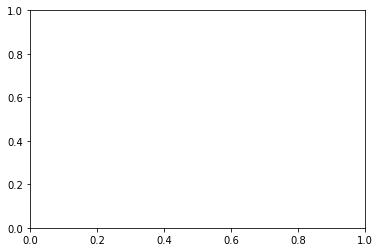

In [ ]:
plt.plot(y_lsq)

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: ignored

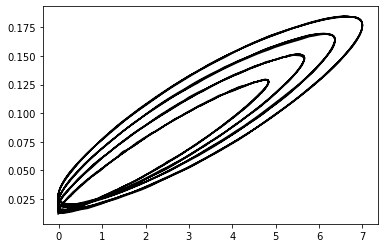

In [ ]:
plt.plot(train_x,train_y,'k',label='true')
plt.plot(train_x,y_lsq,'b', label='linear loss')


In [ ]:
from scipy.optimize import least_squares
x0_rosenbrock = np.array([1.0, 0.3, 1.0])
res_1 = least_squares(fun_rosenbrock,x0_rosenbrock, method='lm')
res_1.x


array([1.        , 1.00000003, 1.        ])

In [ ]:
res_1.cost


0.0010606492214901334

In [ ]:
res_1.optimality

5.408565671845367e-12

In [ ]:
print(res_1)


 active_mask: array([0., 0., 0., ..., 0., 0., 0.])
        cost: 4342.00141284997
         fun: array([1.88963617, 1.88963617, 1.88963617, ..., 1.88963617, 1.88963617,
       1.88963617])
        grad: array([1.32340702e-06, 1.29524952e-06, 1.29524955e-06, ...,
       1.29524946e-06, 1.29524950e-06, 1.26709201e-06])
         jac: array([[7.00350172e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.85449156e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.85449176e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.85449125e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.85449145e-07, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
     

In [ ]:
!pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 45.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import numpy as np
import math
def f_u_k(train_x,a,b,c):
    y = np.array(a-b*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+c*(train_x-(train_x-1))
    return y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import AOLS

In [ ]:
import warnings

import numpy as np
from numpy import linalg as LA

In [ ]:
import numpy as np
def model_equation(train_x):
  y=np.array(1-0.3*np.exp(-abs(train_x))*train_x+1)
  return y

In [ ]:
print(model_equation(train_x))

[2.00486304 2.00486304 2.00477444 ... 1.9955805  1.99727845 1.99945169]


In [ ]:
print(y)

0       0.012032
1       0.014321
2       0.012338
3       0.013406
4       0.012338
          ...   
2427    0.016152
2428    0.015237
2429    0.013253
2430    0.014932
2431    0.011422
Name: y, Length: 2432, dtype: float64


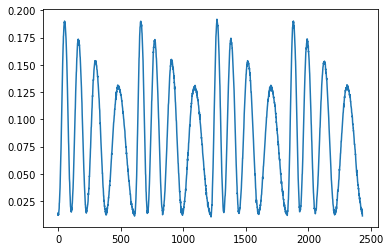

In [ ]:
#import matplotlib.pyplot as plt

plt.plot(y)

In [ ]:
#def aols(self, psi, y):
 def aols(self, psi, train_y):
 
        """Perform the Accelerated Orthogonal Least-Squares algorithm.
        Parameters
        ----------
        y : array-like of shape = n_samples
            The target data used in the identification process.
        psi : ndarray of floats
            The information matrix of the model.
        Returns
        -------
        theta : array-like of shape = number_of_model_elements
            The respective ERR calculated for each regressor.
        piv : array-like of shape = number_of_model_elements
            Contains the index to put the regressors in the correct order
            based on err values.
        residual_norm : float
            The final residual norm.
        References
        ----------
        .. [1] Manuscript: Accelerated Orthogonal Least-Squares for Large-Scale
           Sparse Reconstruction
           https://www.sciencedirect.com/science/article/abs/pii/S1051200418305311
        """
        n, m = psi.shape
        theta = np.zeros([m, 1])
        r = y.copy()
        it = 0
        max_iter = int(min(self.k, np.floor(n / self.L)))
        AOLS_index = np.zeros(max_iter * self.L)
        U = np.zeros([n, max_iter * self.L])
        T = psi.copy()
        while LA.norm(r) > self.threshold and it < max_iter:
            it = it + 1
            temp_in = (it - 1) * self.L
            if it > 1:
                T = T - U[:, temp_in].reshape(-1, 1) @ (
                    U[:, temp_in].reshape(-1, 1).T @ psi
                )

            q = ((r.T @ psi) / np.sum(psi * T, axis=0)).ravel()
            TT = np.sum(T**2, axis=0) * (q**2)
            sub_ind = list(AOLS_index[:temp_in].astype(int))
            TT[sub_ind] = 0
            sorting_indices = np.argsort(TT)[::-1].ravel()
            AOLS_index[temp_in : temp_in + self.L] = sorting_indices[: self.L]
            for i in range(self.L):
                TEMP = T[:, sorting_indices[i]].reshape(-1, 1) * q[sorting_indices[i]]
                U[:, temp_in + i] = (TEMP / np.linalg.norm(TEMP, axis=0)).ravel()
                r = r - TEMP
                if i == self.L:
                    break

                T = T - U[:, temp_in + i].reshape(-1, 1) @ (
                    U[:, temp_in + i].reshape(-1, 1).T @ psi
                )
                q = ((r.T @ psi) / np.sum(psi * T, axis=0)).ravel()

        AOLS_index = AOLS_index[AOLS_index > 0].ravel().astype(int)
        residual_norm = LA.norm(r)
        theta[AOLS_index] = LA.lstsq(psi[:, AOLS_index], y, rcond=None)[0]
        if self.L > 1:
            sorting_indices = np.argsort(np.abs(theta))[::-1]
            AOLS_index = sorting_indices[: self.k].ravel().astype(int)
            theta[AOLS_index] = LA.lstsq(psi[:, AOLS_index], y, rcond=None)[0]
            residual_norm = LA.norm(y - psi[:, AOLS_index] @ theta[AOLS_index])

        pivv = np.argwhere(theta.ravel() > 0).ravel()
        theta = theta[theta > 0]
        return theta.reshape(-1, 1), pivv, residual_norm


TypeError: ignored

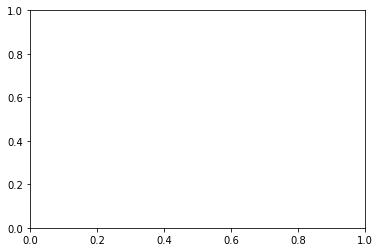

In [ ]:

plt.plot(fun_rosenbrock,res_1)
plt.show()


In [ ]:
import numpy as np
#from numpy.random import default_rng
#rng = default_rng()
def gen_data(train_x, a, b, c):
  
#gen_data(t, a, b, c, noise=0., n_outliers=0, seed=None):
    
         y= a-b*np.exp(-abs(train_x))*train_x+c
  #  y = a + b * np.exp(t * c)

    #error = noise * rng.standard_normal(t.size)
    #outliers = rng.integers(0, t.size, n_outliers)
    #error[outliers] *= 10

    return y 
  #  y + error

a = 1.0
b = 0.3
c = 1.0
#t_min = 0
#t_max = 10
#n_points = 15

#t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(train_x, a, b, c)

IndentationError: ignored

In [ ]:
def fun(x, train_x, y):
    return x[0] + x[1] * np.exp(x[2] * train_x) - y

x0 = np.array([1.0, 0.3, 1.0])
res_lsq = least_squares(fun, x0, args=(train_x, y_train))

In [ ]:
#Numpy for least square (non linear function)
#f[u](k)=(a-b*exp(-|u(k)-ue)|)*(u(k)-ue)+cf(ue) where ue are consider to be 0 intitally
#equation become =(a-b*exp(-|u(k))|*(u(k)+0)
#in Python it must be written as f_u_k=a-b*(exp(-abs(u(k))*u(k) where u(k) is the training input
#u(k)=train_x=x and y=f_u_k
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
a=1
b=0.3
c=1
X=train_x
x=np.array(X)

M=np.vstack([x,np.ones(len(x))]).T
Y=a-b*np.exp(-abs(x))*x+c
y=np.array(Y)
 alpha=least_squares(M,y)
#alpha=np.linalg.lstq(M,y,rcond=None)[0]
b=np.exp(alpha)
print(alpha)
plt.figure()


IndentationError: ignored

In [ ]:
# -*- coding: utf-8 -*-
"""
This is an implementation of the recursive least-squares method that is derived and explained here

https://aleksandarhaber.com/introduction-to-kalman-filter-derivation-of-the-recursive-least-squares-method-with-python-codes/

Author: Aleksandar Haber 
Last Revision: October 25, 2022

"""

class RecursiveLeastSquares(object):
    
    # x0 - initial estimate used to initialize the estimator
    # P0 - initial estimation error covariance matrix
    # R  - covariance matrix of the measurement noise
    def __init__(self,x0,P0,R):
        
        # initialize the values
        self.x0=x0
        self.P0=P0
        self.R=R
        #R=train_y
        # this variable is used to track the current time step k of the estimator 
        # after every time step arrives, this variables increases for one 
        # in this way, we can track the number of variblaes
        self.currentTimeStep=0
                  
        # this list is used to store the estimates xk starting from the initial estimate 
        self.estimates=[]
        self.estimates.append(x0)
         
        # this list is used to store the estimation error covariance matrices Pk
        self.estimationErrorCovarianceMatrices=[]
        self.estimationErrorCovarianceMatrices.append(P0)
        
        # this list is used to store the gain matrices Kk
        self.gainMatrices=[]
         
        # this list is used to store estimation error vectors
        self.errors=[]
    
     
    # this function takes the current measurement and the current measurement matrix C
    # and computes the estimation error covariance matrix, updates the estimate, 
    # computes the gain matrix, and the estimation error
    # it fills the lists self.estimates, self.estimationErrorCovarianceMatrices, self.gainMatrices, and self.errors
    # it also increments the variable currentTimeStep for 1
    
    # measurementValue - measurement obtained at the time instant k
    # C - measurement matrix at the time instant k
    measurementValue=train_y #as per my dataset
    def predict(self,measurementValue,C):
        import numpy as np
        
        # compute the L matrix and its inverse, see Eq. 43
        Lmatrix=self.R+np.matmul(C,np.matmul(self.estimationErrorCovarianceMatrices[self.currentTimeStep],C.T))
        LmatrixInv=np.linalg.inv(Lmatrix)
        # compute the gain matrix, see Eq. 42 or Eq. 48
        gainMatrix=np.matmul(self.estimationErrorCovarianceMatrices[self.currentTimeStep],np.matmul(C.T,LmatrixInv))

        # compute the estimation error                    
        error=measurementValue-np.matmul(C,self.estimates[self.currentTimeStep])
        # compute the estimate, see Eq. 49
        estimate=self.estimates[self.currentTimeStep]+np.matmul(gainMatrix,error)
        
        # propagate the estimation error covariance matrix, see Eq. 50            
        ImKc=np.eye(np.size(self.x0),np.size(self.x0))-np.matmul(gainMatrix,C)
        estimationErrorCovarianceMatrix=np.matmul(ImKc,self.estimationErrorCovarianceMatrices[self.currentTimeStep])
        
        # add computed elements to the list
        self.estimates.append(estimate)
        self.estimationErrorCovarianceMatrices.append(estimationErrorCovarianceMatrix)
        self.gainMatrices.append(gainMatrix)
        self.errors.append(error)
        
        # increment the current time step
        self.currentTimeStep=self.currentTimeStep+1
    

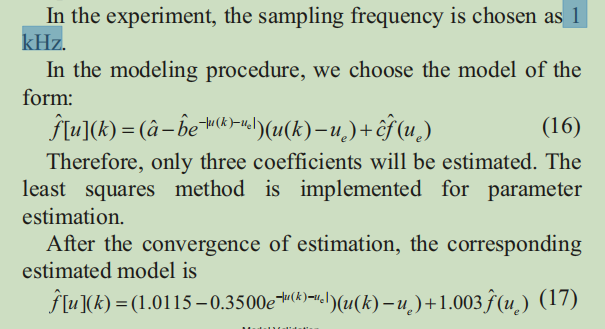

In [ ]:
"""
the code performs a linear and non linear regression
Levenberg–Marquardt algorithm. You have to choose
some parameters delicately to make the result make sense
"""

import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt


def lm_fit(func, x, y, x0, sigma=None, tol=1e-6, dense_output=False, absolute_sigma=False):
    """
    Implementation of Levenberg–Marquardt algorithm
    for non-linear least squares. This algorithm interpolates
    between the Gauss–Newton algorithm and the method of
    gradient descent. It is iterative optimization algorithms
    so finds only a local minimum. So you have to be careful
    about the values ​​you pass in x0

    Parameters
    ----------
    f : callable
        fit function
    x : 1darray
        the independent variable where the data is measured.
    y : 1darray
        the dependent data, y <= f(x, {\theta})
    x0 : 1darray
        initial guess
    sigma : None or 1darray
        the uncertainty on y, if None sigma=np.ones(len(y)))
    tol : float
        required tollerance, the algorithm stop if
        abs(rms_rsn - rms_res) < tol
        rms_rsn = (y - f(x, {\theta^{n+1})/dy
        rms_res = (y - f(x, {\theta^{n})/dy
    dense_output : bool, optional dafult False
        if true all iteration are returned
    absolute_sigma : bool, optional dafult False
        If True, `sigma` is used in an absolute sense and
        the estimated parameter covariance `pcov` reflects
        these absolute values.
        pcov(absolute_sigma=False) = pcov(absolute_sigma=True) * chisq(popt)/(M-N)

    Returns
    -------
    x0 : 1d array or ndarray
        array solution
    pcov : 2darray
        The estimated covariance of popt
    iter : int
        number of iteration
    """

    iter = 0               #initialize iteration counter
    h = 1e-7               #increment for derivatives
    l = 1e-3               #damping factor
    f = 10                 #factor for update damping factor
    M = len(x0)            #number of variable
    N = len(x)             #number of data
    s = np.zeros(M)        #auxiliary array for derivatives
    J = np.zeros((N, M))   #gradient

    if sigma is None :     #error on data
        dy = np.ones(N)
    else :
        dy = sigma

    if dense_output:       #to store solution
        X = []
        X.append(x0)

    while True:
        #jacobian computation
        for i in range(M):                                  #loop over variables
            s[i] = 1                                        #we select one variable at a time
            dz1 = x0 + s*h                                  #step forward
            dz2 = x0 - s*h                                  #step backward
            J[:,i] = (func(x, *dz1) - func(x, *dz2))/(2*h)  #derivative along z's direction
            s[:] = 0                                        #reset to select the other variables

        JtJ = J.T @ J                             #matrix multiplication, JtJ is an MxM matrix
        dia = np.eye(M)*np.diag(JtJ)              #dia_ii = JtJ_ii ; dia_ij = 0
        res = (y - func(x, *x0))/dy               #residuals
        b   = J.T @ res                           #ordinate or “dependent variable” values of system
        d   = np.linalg.solve(JtJ + l*dia, b)     #system solution
        x_n = x0 + d                              #solution at new time

        res_new = (y - func(x, *x_n))/dy          #new residuarls
        rms_res = np.sqrt(sum(res**2))            #=np.linalg.norm, nomr of residuals
        rms_rsn = np.sqrt(sum(res_new**2))        #norm of new residual

        if rms_rsn < rms_res :                    #if i'm closer to the solution
            x0 = x_n                              #update solution
            l /= f                                #reduce damping factor
        else:
            l *= f                                #else magnify

        if abs(rms_rsn - rms_res) < tol:          #break condition
            break

        iter += 1

        if dense_output:
            X.append(x0)

    #compute covariance matrix
    # Do Moore-Penrose inverse discarding zero singular values.
    _, s, VT = svd(J, full_matrices=False)
    threshold = np.finfo(float).eps * max(J.shape) * s[0]

    s = s[s > threshold]
    VT = VT[:s.size]

    pcov = np.dot(VT.T / s**2, VT)

    if not absolute_sigma:
        s_sq = sum(res_new**2) / (N - M)
        pcov = pcov * s_sq

    if not dense_output:
        return x0, pcov, iter
    else :
        X = np.array(X)
        return X, pcov, iter

##a=X,b=m,c=q are the unknow parameters which is to be find
def f(x, m, q,train_x):
 
    """fit function
    """
    return x-m*(math.exp(train_x))*(train_x)+q*train_x-1
    #return m*np.cos(x*q)

##data
x = train_x
y=train_y
#x = np.linspace(1, 5, 27)
#y = f(x, 0.5, 10)
rng = np.random.default_rng(seed=69420)
y_noise = 0.1 * rng.normal(size=x.size)
y  = y + y_noise
dy = np.array(y.size*[0.1])

##fit

init = np.array([-1, 10.])   #|
tau  = 1e-8                  #|> be careful

pars, covm, iter = lm_fit(f, x, y, init, sigma=dy, tol=tau)
dpar = np.sqrt(covm.diagonal())
for i, p, dp in zip(range(len(pars)), pars, dpar):
    print(f"pars{i} = {p:.5f} +- {dp:.5f}")
print(f"numero di iterazioni = {iter}")

#Calcoliamo il chi quadro,indice ,per quanto possibile, della bontà del fit:
chisq = sum(((y - f(x, *pars))/dy)**2.)
ndof = len(y) - len(pars)
print(f'chi quadro = {chisq:.3f} ({ndof:d} dof)')

#Definiamo un matrice di zeri che divverà la matrice di correlazione:
c=np.zeros((len(pars),len(pars)))
#Calcoliamo le correlazioni e le inseriamo nella matrice:
for i in range(0, len(pars)):
    for j in range(0, len(pars)):
       c[i][j] = (covm[i][j])/(np.sqrt(covm.diagonal()[i])*np.sqrt(covm.diagonal()[j]))
print(c) #matrice di correlazione

##Plot
#Grafichiamo il risultato
fig1 = plt.figure(1)
#Parte superiore contenetnte il fit:
frame1=fig1.add_axes((.1,.35,.8,.6))
#frame1=fig1.add_axes((trasla lateralmente, trasla verticamente, larghezza, altezza))
frame1.set_title('Fit dati simulati',fontsize=10)
plt.ylabel('y [u.a.]',fontsize=10)
plt.grid()


plt.errorbar(x, y, dy, fmt='.', color='black', label='dati') #grafico i punti
t = np.linspace(np.min(x), np.max(x), 10000)
plt.plot(t, f(t, *pars), color='blue', alpha=0.5, label='best fit') #grafico del best fit
plt.legend(loc='best')#inserisce la legenda nel posto migliorte


#Parte inferiore contenente i residui
frame2=fig1.add_axes((.1,.1,.8,.2))

#Calcolo i residui normalizzari
ff = (y - f(x, *pars))/dy
frame2.set_ylabel('Residui Normalizzati')
plt.xlabel('x [u.a.]',fontsize=10)

plt.plot(t, 0*t, color='red', linestyle='--', alpha=0.5) #grafico la retta costantemente zero
plt.plot(x, ff, '.', color='black') #grafico i residui normalizzati
plt.grid()


##Plot tariettoria
N = 200
p1 = np.linspace(-1, 1.25, N)
p2 = np.linspace(8, 11.5, N)

S2 = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        S2[i, j] = (((y - f(x, p1[i], p2[j]))/dy)**2).sum()

init1 = np.array([-1, 10.])
init2 = np.array([-1, 10.5])
init3 = np.array([-1, 9.5])
tau   = 1e-8

popt1, _, _ = lm_fit(f, x, y, init1, sigma=dy, tol=tau, dense_output=True)
popt2, _, _ = lm_fit(f, x, y, init2, sigma=dy, tol=tau, dense_output=True)
popt3, _, _ = lm_fit(f, x, y, init3, sigma=dy, tol=tau, dense_output=True)

plt.figure(2)
plt.title("Traiettorie soluzioni")
plt.xlabel('x')
plt.ylabel('y')
levels = np.linspace(np.min(S2), np.max(S2), 40)
p1, p2 = np.meshgrid(p1, p2)
c=plt.contourf(p1, p2, S2.T , levels=levels, cmap='jet')
plt.colorbar(c)
plt.grid()
plt.plot(popt1[:,0], popt1[:,1], 'k', label='tariettoria1')
plt.plot(popt2[:,0], popt2[:,1], 'k', label='tariettoria2')
plt.plot(popt3[:,0], popt3[:,1], 'k', label='tariettoria3')
plt.legend(loc='best')

plt.show()


In [ ]:
#parameter identification through gradient decent algo
import numpy as np
import matplotlib.pyplot as plt
import math
# Building the model
#m = 0
#c = 0
#initialize the parameter from exp. data
u_k=train_x
u_e=0
del_u_k=(u_k)-(u_e)
a=0
b=0
c=0
L = 0.002  # The learning Rate
epochs = 500  # The number of iterations to perform gradient descent

n = float(len(train_x)) # Number of elements in train_x

f_u_k=np.zeros(np.size(train_y))
# Performing Gradient Descent 
for i in range(epochs): 
        f_u_k=a-b*abs(math.exp(del_u_k))*(del_u_k)+c*del_u_k
        #Y_pred = m*X + c  # The current predicted value of Y
     D_a = (-2/n)*sum(train_x*(train_y-f_u_k))  # Derivative wrt a
     D_b = (-2/n)*sum(train_y-f_u_k)  # Derivative wrt b
     D_c = (-2/n)*sum(train_y-f_u_k) # Derivative wrt b
    a = a - L * D_a  # Update a
    b = b - L * D_b  # Update b
    c = c - L * D_c  # Update c
    
print (a,b,c)

IndentationError: ignored

In [ ]:
# Making predictions
#Y_pred = m*X + c

import numpy as np
import matplotlib.pyplot as plt
import math
# define the true parameters that we want to estimate
a=1   
b=0.3  
c=1
u_e=0
f_u_e=0

# noise standard deviation
noiseStd=1;

# simulation time
#simulationTime=np.linspace(0,15,2000)
u_k=train_x
f_u_k=train_y
del_u_k=(u_k)-(u_k-1)

f_u_k=a-b*math.exp(-abs(u_k-u_e))*(u_k-u_e)+c*f_u_e
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
This is the main file that demonstrates how to use the recursive least squares method 
implemented in RecursiveLeastSquares.py
The background information and explanation of this code is given here 

https://aleksandarhaber.com/introduction-to-kalman-filter-disciplined-python-implementation-of-recursive-least-squares-method/
"""

import numpy as np
import matplotlib.pyplot as plt
import math
#from RecursiveLeastSquares import RecursiveLeastSquares

# define the true parameters that we want to estimate
a=1
b=0.3
c=1
u_e=0
f_u_e=0

# noise standard deviation
noiseStd=1;

# simulation time
#simulationTime=np.linspace(0,15,2000)
u_k=train_x
f_u_k=train_y
del_u_k=(u_k)-(u_k-1)

f_u_k=a-b*math.exp(-abs(u_k-u_e))*(u_k-u_e)+c*f_u_e


IndexError: ignored

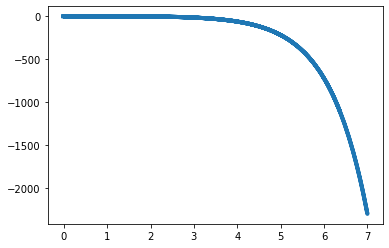

In [ ]:
# -*- coding: utf-8 -*-
"""
This is the main file that demonstrates how to use the recursive least squares method 
implemented in RecursiveLeastSquares.py
The background information and explanation of this code is given here 

https://aleksandarhaber.com/introduction-to-kalman-filter-disciplined-python-implementation-of-recursive-least-squares-method/
"""

import numpy as np
import matplotlib.pyplot as plt
import math
#from RecursiveLeastSquares import RecursiveLeastSquares

# define the true parameters that we want to estimate

# true value of the parameters that will be estimated 
#here a=initialPosition=1,b= acceleration=0.3,c initialVelocity=1
#initialPosition=1
#acceleration=0.3
#initialVelocity=1
a=1
b=0.3
c=1
# noise standard deviation
#noiseStd=1;

# simulation time
#simulationTime=np.linspace(0,15,0.001)
# vector used to store the somulated position
#simulationTime=train_x
#simulationTime
#f_u_k=np.zeros(np.size(simulationTime))

# simulate the system behavior
#for i in np.arange(np.size(simulationTime)):
 
#find the exponential of the specified value
  f_u_k = (a-b*math.exp(-abs(tain_x-0)))*(tain_x-0)+c*0
   #position [i]= (initialPosition-acceleration*abs(math.exp(abs(simulationTime[i]))))*simulationTime[i]+initialVelocity
   #(a-b*math.exp(-abs(u(k)-ue)))*(u(k)-ue)+c*f(ue)
   # position[i]=initialPosition+initialVelocity*simulationTime[i]+(acceleration*simulationTime[i]**2)/2

# add the measurement noise 
#positionNoisy=simulationTime[i]
#positionNoisy=position+noiseStd*np.random.randn(np.size(simulationTime))

# verify the position vector by plotting the results
#plotStep=300
#plt.plot(simulationTime[0:plotStep],position[0:plotStep],linewidth=4, label='Ideal position')
#plt.plot(simulationTime[0:plotStep],positionNoisy[0:plotStep],'r', label='Observed position')
#plt.xlabel('time')
#plt.ylabel('position')
#plt.legend()
#plt.savefig('data.png',dpi=300)
plt.show()

x0=np.random.randn(3,1)
P0=100*np.eye(3,3)
R=0.5*np.eye(1,1)

# create a recursive least squares object
RLS=RecursiveLeastSquares(x0,P0,R)

# simulate online prediction
for j in np.arange(np.size(simulationTime[i])):
    C=np.array([[1,simulationTime[j],(simulationTime[j]**2)/2]])
    RLS.predict(positionNoisy[j],C)

# extract the estimates in order to plot the results
estimate1=[]
estimate2=[]
estimate3=[]    
for j in np.arange(np.size(simulationTime[i])):
    estimate1.append(RLS.estimates[j][0])
    estimate2.append(RLS.estimates[j][1])
    estimate3.append(RLS.estimates[j][2])
    
# create vectors corresponding to the true values in order to plot the results
estimate1true=initialPosition*np.ones(np.size(simulationTime[i]))
estimate2true=initialVelocity*np.ones(np.size(simulationTime[i]))
estimate3true=acceleration*np.ones(np.size(simulationTime[i]))


# plot the results
steps=np.arange(np.size(simulationTime[i]))
fig, ax = plt.subplots(3,1,figsize=(10,15))
ax[0].plot(steps,estimate1true,color='red',linestyle='-',linewidth=6,label='True value of position')
ax[0].plot(steps,estimate1,color='blue',linestyle='-',linewidth=3,label='True value of position')
ax[0].set_xlabel("Discrete-time steps k",fontsize=14)
ax[0].set_ylabel("Position",fontsize=14)
ax[0].tick_params(axis='both',labelsize=12)
#ax[0].set_yscale('log')
#ax[0].set_ylim(98,102)  
ax[0].grid()
ax[0].legend(fontsize=14)

ax[1].plot(steps,estimate2true,color='red',linestyle='-',linewidth=6,label='True value of velocity')
ax[1].plot(steps,estimate2,color='blue',linestyle='-',linewidth=3,label='Estimate of velocity')
ax[1].set_xlabel("Discrete-time steps k",fontsize=14)
ax[1].set_ylabel("Velocity",fontsize=14)
ax[1].tick_params(axis='both',labelsize=12)
#ax[0].set_yscale('log')
#ax[1].set_ylim(0,2)  
ax[1].grid()
ax[1].legend(fontsize=14)

ax[2].plot(steps,estimate3true,color='red',linestyle='-',linewidth=6,label='True value of acceleration')
ax[2].plot(steps,estimate3,color='blue',linestyle='-',linewidth=3,label='Estimate of acceleration')
ax[2].set_xlabel("Discrete-time steps k",fontsize=14)
ax[2].set_ylabel("Acceleration",fontsize=14)
ax[2].tick_params(axis='both',labelsize=12)
#ax[0].set_yscale('log')
#ax[1].set_ylim(0,2)  
ax[2].grid()
ax[2].legend(fontsize=14)

fig.savefig('plots.png',dpi=600)





#Second attempt through Gradient Descent Algorithm

In [ ]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(train_x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*train_x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(train_x * (train_y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(train_y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.02462598419351897 0.006437293217272271


In [ ]:
# Making predictions
Y_pred = m*train_x + c

plt.scatter(train_x, train_y)
plt.plot([min(train_x), max(train_x)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# implementation of Preisac model on my given data set (train_x,train_x)

In [ ]:
import numpy as np
x=train_x #input values 

def preisach_model(x, alpha, beta):
    """
    Computes the output of the Preisach model for the given input x, alpha and beta
    """
    y = np.zeros_like(x)
    for i, xi in enumerate(x):
        y[i] = alpha * xi + beta * np.sum(np.maximum(0, xi - x[:i]))
    return y


In [ ]:
import numpy as np
x = train_x
print(x)

[-0.01647949 -0.01647949 -0.01617432 ...  0.01495361  0.00915527
  0.00183105]


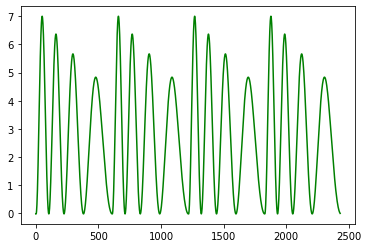

In [ ]:
plt.plot(x,'g')
plt.show()

In [ ]:
y=train_y
#y = np.sin(2*np.pi*x)

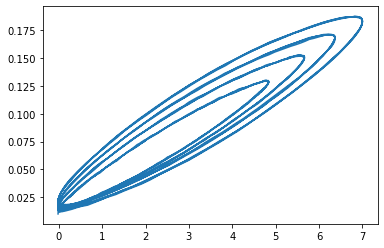

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
import numpy as np

from scipy.optimize import least_squares
import numpy as np
x = train_x
y=train_y
def objective_function(params, x, y):
    """
    Computes the objective function to be minimized by the least squares algorithm
    """
    alpha, beta = params
    y_pred = preisach_model(x, alpha, beta)
    return y_pred - y

# generate some sample data
#x = np.linspace(0, 1, 100)
#y = np.sin(2*np.pi*x)

# estimate the model parameters
params = least_squares(objective_function, [0, 0], args=(x, y)).x


In [ ]:
print(params)

[ 2.85561426e-02 -1.68266229e-06]


In [ ]:
import numpy as np
x=train_x #input values 
alpha=2.85561426e-02
beta= -1.68266229e-06
def preisach_model(x, alpha, beta):
    """
    Computes the output of the Preisach model for the given input x, alpha and beta
    """
    y = np.zeros_like(x)
    for i, xi in enumerate(x):
        y[i] = alpha * xi + beta * np.sum(np.maximum(0, xi - x[:i]))
    return y

In [ ]:
import numpy as np
x=train_x #input values 
alpha=2.85561426e-02
beta= -1.68266229e-06
y_pred = preisach_model(x, alpha, beta)

In [ ]:
import matplotlib as plt

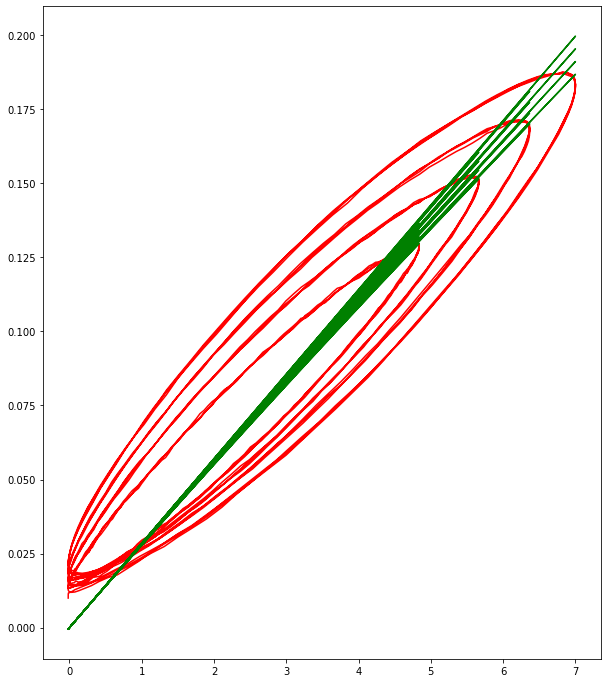

In [ ]:
fig = plt.figure(figsize=(10, 12))
plt.plot(train_x,train_y,'r')
plt.plot(train_x,y_pred,'g')
plt.show()


# implementation of preisach model just for understanding

In [ ]:
import numpy as np
x=train_x
#y=train_y
alpha=1
beta=0.3
def preisach_model(x, alpha, beta):
    """
    Computes the output of the Preisach model for the given input x, alpha and beta
    """
    y = np.zeros_like(x)
    for i, xi in enumerate(x):
        y[i] = alpha * xi + beta * np.sum(np.maximum(0, xi - x[:i]))
    return y


In [ ]:
from scipy.optimize import least_squares

def objective_function(params, x, y):
    """
    Computes the objective function to be minimized by the least squares algorithm
    """
    #alpha, beta = params
        
    y_pred = preisach_model(x, alpha, beta)
    return y_pred - y

# generate some sample data
#x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)

# estimate the model parameters
params = least_squares(objective_function, [0, 0], args=(x, y)).x


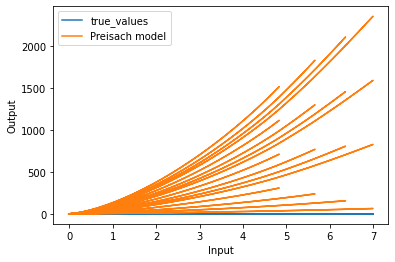

In [ ]:
import matplotlib.pyplot as plt

# Generate a range of input values
#x = np.linspace(0, 1, 100)

 
# Use the preisach_model function to generate the predicted output for the input range
y_pred = preisach_model(x, alpha, beta)

# Plot the predicted output against the input values
plt.plot(x, y, label='true_values')
plt.plot(x, y_pred, label='Preisach model')

# Add axis labels and a legend to the plot
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Display the plot
plt.show()


In [ ]:
import numpy as np

# Generate some dummy data for training
train_x = train_x
y = train_y

# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+x[2]*(train_x-(train_x-1))

# Initialize the parameter estimates and the covariance matrix
x = np.array([0, 0, 0])
P = np.eye(3)

# Define the forgetting factor and the regularization parameter
lambda_ = 0.99
delta = 1e-6

# Iterate over the training data
for i in range(len(train_x)):
    # Compute the predicted output and the error
    y_pred = f(x, train_x[i])
    e = y[i] - y_pred

    # Compute the Kalman gain
    z = (train_x[i]-(train_x[i]-1)) * np.exp(-abs(train_x[i]-(train_x[i]-1)))
    X = np.array([z, train_x[i]-(train_x[i]-1), 1])
    K = P.dot(X) / (lambda_ + X.dot(P).dot(X))

    # Update the parameter estimates and the covariance matrix
    x = x + K * e
    P = (P - K.reshape((3, 1)).dot(X.reshape((1, 3))).dot(P)) / lambda_ + delta

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(x[0], x[1], x[2]))


ValueError: ignored

# https://github.com/TheoChristiaanse
A Preisach Toy Model written in python for educational purposes
try to attempt presisach model

In [ ]:
import numpy as np
# Interpolation Functions
from scipy.interpolate import RectBivariateSpline, interp1d, interp2d
# Plotting
import matplotlib.pyplot as plt
# Debugging libraries
import sys
import os
# Import time to time the simulation
import time

from bokeh.io import push_notebook
from bokeh.layouts import gridplot
from bokeh.layouts import row, widgetbox
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d,CustomJS,Slider,Span,ColumnDataSource
from scipy.interpolate import interp1d
from bokeh.models.widgets import Slider
from ipywidgets import interact, widgets, FloatSlider

In [ ]:
def generateMu(n,a0):
    N       = int(n*(n+1)/2)
    mu      = np.zeros((3,N))
    mu[2,:] = -1 # Set all values to negative 
    d       = 2*a0/(n+1) # vertical/horizontal distance
    mu[0,0] = -a0+1.5*d # y - value
    mu[1,0] = -a0+0.5*d # x - value
    h=mu[0,0]
    count=0
      for i in range(0,n):
        h=h+d
        for j in range(i+1):
            count=count+1
            mu[0,count]=h
            if (np.abs(mu[0,count])<10**-10):
                mu[0,count]=0
            if j==0:
                mu[1,count]=mu[1,0]
            else:
                mu[1,count]=mu[1,count-1]+d    
            if (np.abs(mu[1,count])<10**-10):
                mu[1,count]=0
    return mu

IndentationError: ignored

In [ ]:
a0=.2
n=50
mu=generateMu(n,a0)
p1 = figure(title="Hysterons Distribution")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = '\u0251'
p1.yaxis.axis_label = '\u03B2'
p1.x_range = Range1d(-a0, a0)
p1.y_range = Range1d(-a0, a0)
colors_va=[]
for i in range(len(mu[1,:])):
    colors_va = np.append(colors_va,["navy"])
    pdata = {'x_val': mu[1,:],
        'y_val': mu[0,:],
        'colors': colors_va}
psource = ColumnDataSource(data=pdata)
r0=p1.circle('x_val', 'y_val', size=1, color='colors', alpha=0.5,source=psource)
p1.legend.location = "bottom_right"
s2 = ColumnDataSource(data=dict(x=[-a0, a0], ym=[-a0, a0]))
r1=p1.line(x='x', y='ym', color="black", line_width=1, alpha=0.6, source=s2)
s3 = ColumnDataSource(data=dict(x=[-a0, a0], ym=[-a0, -a0]))
r2=p1.line(x='x', y='ym', color="orange", line_width=5, alpha=0.6, source=s3)
p2 = figure(title="Cycle")
p2.grid.grid_line_alpha = 0.3
p2.xaxis.axis_label = 'Input'
p2.yaxis.axis_label = 'Output'
p2.x_range = Range1d(-a0, a0)
p2.y_range = Range1d(-(n*(n+1)/2), (n*(n+1)/2))
r3=p2.line([-a0], [-a0*n],line_width=2)
p2.legend.location = "top_left"

# output notebook
output_notebook()
def update(value):
  if     ((r2.data_source.data['x'][1]==a0) & (r2.data_source.data['x'][0]==-a0)):
        vert = 0
        hor  = 1
    elif   ((r2.data_source.data['ym'][1]==a0) & (r2.data_source.data['ym'][0]==-a0)):
        vert = 1
        hor  = 0
    if ((r2.data_source.data['ym'][0]<=value) & hor):   # change postive and hor
        r2.data_source.data['ym'] = [value,value]      # set location of horizontal line
    elif ((r2.data_source.data['ym'][0]>value) & hor): # change negative and hor
        r2.data_source.data['ym'] = [-a0,a0]           # change to vertical line
        r2.data_source.data['x']  = [value,value]      # set location
    elif ((r2.data_source.data['x'][0]>=value) & vert):# change negative and vertical 
        r2.data_source.data['x']  = [value,value]      # update location 
    elif ((r2.data_source.data['x'][0]<value) & vert):# change negative and vertical 
        r2.data_source.data['ym'] = [value,value]      # set location of horizontal line
        r2.data_source.data['x']  = [-a0,a0]           # change to horizontal line
    if hor:
        for i,val in enumerate(mu[0,:]):
            if (value>val):
                mu[2,i]=1
                r0.data_source.data['colors'][i] = "pink"
    if vert:
        for i,val in enumerate(mu[1,:]):
          if (value<val):
                mu[2,i]=-1
                r0.data_source.data['colors'][i] = "navy"
    newx = np.append(r3.data_source.data['x'],value)
    newy = np.append(r3.data_source.data['y'],np.sum(mu[2,:]))
    r3.data_source.data = {'x' : newx, 'y' : newy}
    push_notebook()
show(gridplot([[p1,p2]], plot_width=300, plot_height=300))
val_widget = FloatSlider(min=-a0, max=a0, step=a0/20, value=-a0)
interact(update,value=val_widget)

IndentationError: ignored

#https://github.com/fddf22/Preisachmodel/blob/main/preisachmodel.py
Forward and numerically inverted Preisach model coded in Python based on the formulation by Isaak D. Mayergoyz

Books/Papers:

Mathematical models of hysteresis, Isaak D. Mayergoyz

Identification and Inversion of Magnetic Hysteresis for Sinusoidal Magnetization' by Martin Kozek and Bernhard Gross

Removing numerical instabilities in the Preisach model identification using genetic algorithms' by G. Consolo G. Finocchio, M. Carpentieri, B. Azzerboni

IEEE TRANSACTIONS ON MAGNETICS, VOL. 39, NO. 3, MAY 2003 'Analytical Approximation of Preisach Distribution Functions' by Janos Fuezi

In [ ]:
# Author: fddf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import collections
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import LinearNDInterpolator, griddata
from typing import Tuple, Callable, List
import time
import copy

In [ ]:
def analyticalPreisachFunction1(a: float, b: float, c: float, d: float, n: float, p: float, q: float, beta: np.ndarray,
                                alpha: np.ndarray) -> np.ndarray:
    """
    Function based on Paper IEEE TRANSACTIONS ON MAGNETICS, VOL. 39, NO. 3, MAY 2003 'Analytical  Approximation  of  Preisach
    Distribution Functions' by Janos Fuezi
    """
    hm = (alpha + beta) / 2
    hc = (alpha - beta) / 2
    nom1 = c
    den1 = (1 + np.square(a) * np.square(alpha + b)) * (1 + np.square(a) * np.square(beta - b))
    nom2 = d
    den2 = np.exp(n * np.square(hm)) * np.exp(p * np.square(hc + q))
    preisach = nom1 / den1 + nom2 / den2
    # set lower right diagonal to zero
    for i in range(preisach.shape[0]):
        preisach[i, (-i - 1):] = 0
    return preisach

In [ ]:
def analyticalPreisachFunction2(A: float, Hc: float, sigma: float, beta: np.ndarray, alpha: np.ndarray) -> np.ndarray:
    """
    Function based on Paper 'Removing numerical instabilities in the Preisach model identification
    using genetic algorithms' by G. Consolo G. Finocchio, M. Carpentieri, B. Azzerboni.
    """
    nom1 = 1
    den1 = 1 + ((beta - Hc) * sigma / Hc) ** 2
    nom2 = 1
    den2 = 1 + ((alpha + Hc) * sigma / Hc) ** 2
    preisach = A * (nom1 / den1) * (nom2 / den2)
    # set lower right diagonal to zero
    for i in range(preisach.shape[0]):
        preisach[i, (-i - 1):] = 0
    return preisach


In [ ]:

def initPreisachWithOnes(gridX: np.ndarray) -> np.ndarray:
    """
    Initialize the Preisach distribution function with ones over the entire Preisach-plane
    """
    preisach = np.ones_like(gridX)
    # set lower right diagonal to zero
    for i in range(preisach.shape[0]):
        preisach[i, (-i - 1):] = 0
    return preisach

In [ ]:
def removeInBetween(arr: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Function for removing in between points of an array
    """
    whipeout_indexes = np.empty(len(arr), dtype=np.bool)
    if len(arr) < 3:
        whipeout_indexes[:] = True
        return arr, whipeout_indexes
    else:
        range_list = list(range(1, len(arr) - 1))
        whipeout_indexes[0] = True
        whipeout_indexes[-1] = True
        for i in range_list:
            if arr[i] == arr[i - 1] == arr[i + 1]:
                whipeout_indexes[i] = False
            else:
                whipeout_indexes[i] = True
        return arr[whipeout_indexes], whipeout_indexes

In [ ]:
def removeRedundantPoints(pointsX: np.ndarray, pointsY: np.ndarray) -> np.ndarray:
    """
    Function for removing redundant points inside vertices and horizontal lines of staircase polylines
    """
    pointsX, whipeout_indices = removeInBetween(pointsX)
    pointsY = pointsY[whipeout_indices]
    pointsY, whipeout_indices = removeInBetween(pointsY)
    pointsX = pointsX[whipeout_indices]
    return pointsX, pointsY

In [ ]:
def preisachIntegration(w: float, Z: np.ndarray) -> np.ndarray:
    """
    Perform 2D- integration of the Preisach distribution function.
    """
    flipped = np.fliplr(np.flipud(w * Z))
    flipped_integral = np.cumsum(np.cumsum(flipped, axis=0), axis=1)
    return np.fliplr(np.flipud(flipped_integral))

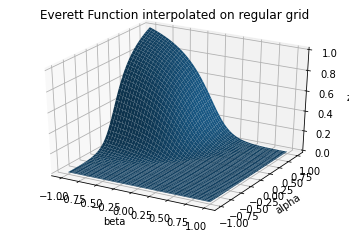

Inverting Model...


<ipython-input-18-0201d69b03c9>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  whipeout_indexes = np.empty(len(arr), dtype=np.bool)


Model inversion succesfull !!!


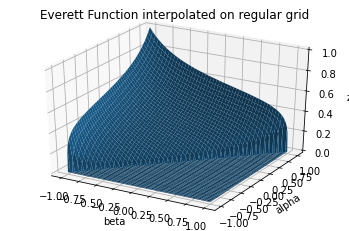

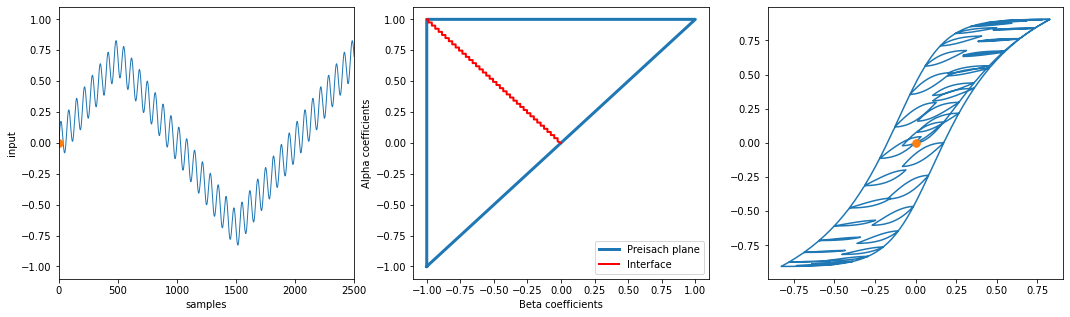

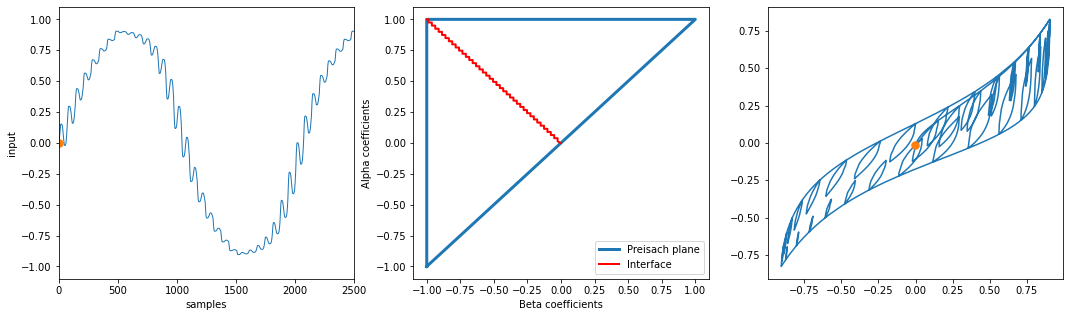

In [ ]:
class PreisachModel:
    """
    Efficient implementation of the scalar Preisach model
    """

    def __init__(self, n: int, alpha0: float) -> None:
        self.n = n
        self.alpha0 = alpha0
        self.beta0 = alpha0
        x = np.linspace(-self.beta0, self.beta0, n - 1)
        y = np.linspace(-self.alpha0, self.alpha0, n - 1)
        self.width = 2 * alpha0 / (n - 1)
        self.gridX, self.gridY = np.meshgrid(x, y)
        # flip  gridY to be compatible with definiton of preisach plane
        self.gridY = np.flipud(self.gridY)
        self.pointsX = np.array([-self.beta0], dtype=np.float64)
        self.pointsY = np.array([-self.alpha0], dtype=np.float64)
        self.interfaceX = np.array([-self.beta0, -self.beta0], dtype=np.float64)
        self.interfaceY = np.array([-self.alpha0, -self.alpha0], dtype=np.float64)
        self.historyInterfaceX: List[float] = []
        self.historyInterfaceY: List[float] = []
        self.historyU = - self.alpha0 * np.ones(1, dtype=np.float64)
        self.historyOut = np.zeros(0, dtype=np.float64)
        self.state = 'ascending'
        self.stateOld = 'ascending'
        self.stateChanged = False
        self.everett: Callable[[float, float], float]

    def __call__(self, *args, **kwargs) -> float:
        """
        Call model with input value given as argument
        """
        self.pointsX = self.interfaceX[:-1]
        self.pointsY = self.interfaceY[:-1]
        u = args[0]
        if u > self.historyU[-1]:
            self.state = 'ascending'
        elif u < self.historyU[-1]:
            self.state = 'descending'
        if self.state != self.stateOld:
            self.stateChanged = True
        else:
            self.stateChanged = False

        if self.stateChanged:
            # reached boundary
            self.pointsX = np.append(self.pointsX, self.historyU[-1])
            self.pointsY = np.append(self.pointsY, self.historyU[-1])

        if self.state == 'ascending':
            self.pointsY[self.pointsY <= u] = u
            self.pointsY[-1] = u

        elif self.state == 'descending':
            self.pointsX[self.pointsX >= u] = u
            self.pointsX[-1] = u

        self.interfaceX = np.append(self.pointsX, u)
        self.interfaceY = np.append(self.pointsY, u)

        self.interfaceX, self.interfaceY = removeRedundantPoints(self.interfaceX, self.interfaceY)

        self.stateOld = self.state
        self.historyInterfaceX.append(copy.deepcopy(self.interfaceX))
        self.historyInterfaceY.append(copy.deepcopy(self.interfaceY))
        self.historyU = np.append(self.historyU, copy.deepcopy(u))
        output = self.calculateOutput()
        self.historyOut = np.append(self.historyOut, copy.deepcopy(output))
        return output

    def setNegSatState(self) -> None:
        """
        Set the interface to negative saturation.
        """
        self.pointsX = np.array([-self.beta0], dtype=np.float64)
        self.pointsY = np.array([-self.alpha0], dtype=np.float64)
        self.interfaceX = np.array([-self.beta0, -self.beta0], dtype=np.float64)
        self.interfaceY = np.array([-self.alpha0, -self.alpha0], dtype=np.float64)
        self.resetHistory()

    def resetHistory(self) -> None:
        """
        Reset all model history parameters.
        """
        self.historyInterfaceX = []
        self.historyInterfaceY = []
        self.historyU = - self.alpha0 * np.ones(1, dtype=np.float64)
        self.historyOut = np.zeros(0, dtype=np.float64)
        self.state = 'ascending'
        self.stateOld = 'ascending'
        self.stateChanged = False

    def setDemagState(self, n: int = -1) -> None:
        """
        Function for setting the interface so that the output of the model will
        be zero initially (demagnetized state).
        Parameters
        ----------
        n : int
            Demagnetization step granularity
        """
        if n == -1:
            n = 150

        self.setNegSatState()
        excitation = np.linspace(1, 0, n)
        excitation[1::2] = - excitation[1::2]
        for i in excitation:
            self(i)

        self.resetHistory()

    def invert(self) -> 'PreisachModel':
        """
        Return inverse Preisachmodel by constructing the inverse Everett
        function from the non inverted model using first order reversal curves (FODs).
        Grid points of the inverse Everett function are defined by the response values
        of the non inverse model. Inverse Everett function values on these grid points are directly
        defined by the dominant input extrema of the non inverted model. Inverse Everett function
        on irregular grid is interpolated using irregular grid interpolation.
        For a description of Preisach model inversion also see the following paper:
        'Identification and Inversion of Magnetic Hysteresis for Sinusoidal Magnetization' by Martin Kozek and
        Bernhard Gross
        """
        invModel = PreisachModel(self.n, self.alpha0)

        # Construct set of first order reversal curves (FODs) for identification of the inverse everett map
        # number of FODs correspond to the number of Hystereon elements n in Preisach plane
        FODs = np.zeros((self.n * self.n // 2 + self.n // 2 + 1, 2), dtype=np.float64)
        Mk = np.zeros(FODs.shape[0], dtype=np.float64)
        mk = np.zeros(FODs.shape[0], dtype=np.float64)
        invEverettVals = np.zeros(FODs.shape[0], dtype=np.float64)
        cnt = 0
        print('Inverting Model...')
        for valAlpha in np.linspace(-self.alpha0, self.alpha0, self.n - 1):
            for valBeta in np.linspace(-self.beta0, valAlpha, int((valAlpha - (-self.alpha0)) // self.width)):
                FODs[cnt, 0] = valAlpha
                FODs[cnt, 1] = valBeta
                # Reset and excite non inverted model with the FODs to get the grid Points of the inverse model
                # by dominant output extrema of the non inverted model
                self.setNegSatState()
                invEverettVals[cnt] = (1 / 2) * (valAlpha - valBeta)
                Mk[cnt] = self(valAlpha)
                mk[cnt] = self(valBeta)
                cnt += 1

        points = np.zeros((len(Mk), 2), dtype=np.float64)
        points[:, 1] = np.concatenate([Mk])
        points[:, 0] = np.concatenate([mk])
        Z = np.concatenate([invEverettVals])
        # Fit interpolator function on irregular grid using linear interpolation
        invEverettInterp = LinearNDInterpolator(points, Z, fill_value=0)

        # Set interpolator as everett function of the inverse model
        invModel.setEverettFunction(invEverettInterp)

        # return inverse model
        print('Model inversion succesfull !!!')
        return invModel

    def calculateOutput(self, **kwargs) -> float:
        """
        Calculate the output of the model with the current interface.
        Negative beta0 required, because beta0 was defined to be positive,
        however in the book 'mathematical models of hysteresis' from Mayergoyz, -
        (alpha0, beta0) is defined as the left top corner of the preisach triangle.
        Therefore beta0 has to be inverted to give the correct value
        Also the parameter order was defined different E(x,y)
        """
        if kwargs.get('mode'):
            mode = kwargs['mode'].lower()
        else:
            mode = 'default'

        if mode == 'default':
            sum = 0.0
            for i in range(1, len(self.interfaceX)):
                Mk = self.interfaceY[i]
                mk = self.interfaceX[i]
                mkOld = self.interfaceX[i - 1]
                sum = sum + (self.everett(mkOld, Mk) - self.everett(mk, Mk))
            output = -self.everett(-self.beta0, self.alpha0) + 2 * sum

        else:
            # alternative output calculation
            pass

        return output

    def setEverettFunction(self, everett: Callable[[float, float], float]) -> None:
        """
        Set everett function to given interpolator function.
        Parameters
        ----------
        everett : callable python method
            Interpolator for Everett function
        """
        if not isinstance(everett, collections.abc.Callable):
            raise ValueError('Given Parameter must be a callable function')
        self.everett = everett

    def showEverettFunction(self, fig: plt.Figure) -> None:
        """
        Show the Everett function in custom figure provided as argument
        """
        ax = fig.add_subplot(111, projection='3d')
        Z = self.everett(self.gridX, self.gridY)
        ax.plot_surface(gridX, gridY, Z)
        ax.set_title('Everett Function interpolated on regular grid')
        ax.set_xlabel('beta')
        ax.set_ylabel('alpha')
        ax.set_zlabel('z')
        plt.show()

    def showInterface(self, fig: plt.Figure) -> None:
        """
        Show the current  interface in custom figure provided as argument
        """
        ax = fig.add_subplot(111)
        ax.plot(self.interfaceX, self.interfaceY, 'r', linewidth=3)
        ax.plot(np.array([-self.beta0, self.beta0, -self.beta0, -self.beta0]),
                np.array([-self.alpha0, self.alpha0, self.alpha0, -self.alpha0]), linewidth=3)
        ax.xlim(-self.beta0 * 1.1, self.beta0 * 1.1)
        ax.ylim(-self.alpha0 * 1.1, self.alpha0 * 1.1)
        ax.title('{},{}'.format(self.interfaceX.tolist(), self.interfaceY.tolist()))
        ax.xlabel('Beta coefficients')
        ax.ylabel('Alpha coefficients')
        ax.axes().set_aspect('equal')
        ax.grid()
        ax.legend(['Interface', 'Preisach Plane'])
        ax.show()

    def animateHysteresis(self) -> animation.FuncAnimation:
        # Todo vector length of u and out must be same
        self.historyU = self.historyU[1:]

        def update_line(num, self, line1, line2, line3):
            line1.set_xdata(num)
            line1.set_ydata(self.historyU[num])
            line2.set_xdata(self.historyInterfaceX[num])
            line2.set_ydata(self.historyInterfaceY[num])
            line3.set_xdata(self.historyU[num])
            line3.set_ydata(self.historyOut[num])
            return line1, line2, line3

        frames = len(self.historyInterfaceX)

        gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1])
        fig1 = plt.figure(figsize=(18, 5))
        ax1 = plt.subplot(gs[0, 0])
        ax2 = plt.subplot(gs[0, 1])
        ax3 = plt.subplot(gs[0, 2])

        # create plot of input
        ax1.plot(self.historyU, linewidth=1)
        ax1.set_xlim([0, len(self.historyU)])
        ax1.set_ylim([-self.alpha0 * 1.1, self.alpha0 * 1.1])
        ax1.set_xlabel('samples')
        ax1.set_ylabel('input')

        line1, = ax1.plot([0.0], [0.0], '.', markersize=15)

        # create plot of preisach plane
        ax2.plot(np.array([-self.beta0, self.beta0, -self.beta0, -self.beta0]),
                 np.array([-self.alpha0, self.alpha0, self.alpha0, -self.alpha0]), linewidth=3)
        line2, = ax2.plot([], [], 'r', linewidth=2)
        ax2.set_xlim(-self.beta0 * 1.1, self.beta0 * 1.1)
        ax2.set_ylim(-self.alpha0 * 1.1, self.alpha0 * 1.1)
        ax2.set_xlabel('Beta coefficients')
        ax2.set_ylabel('Alpha coefficients')
        ax2.legend(['Preisach plane', 'Interface'], loc='lower right')

        # create plot of hysteresis
        ax3.plot(self.historyU, self.historyOut)
        line3, = ax3.plot([0.0], [0.0], '.', markersize=15)

        simulation = animation.FuncAnimation(fig1, update_line, frames,
                                             fargs=(self, line1, line2, line3), interval=25,
                                             blit=True, repeat=False)

        plt.show()
        return simulation


if __name__ == "__main__":

    model = PreisachModel(200, 1)
    gridX = model.gridX
    gridY = model.gridY
    width = model.width

    ######## init with ones #########
    # preisach = initPreisachWithOnes()

    # ####### analytic 1 #############
    # A = 71
    # B = -0.018
    # C = 0.013
    # D = 0.068
    # N = 15
    # P = 2500
    # Q = 0.04
    # preisach = analyticalPreisachFunction1(A, B, C, D, N, P, Q, gridX, gridY)

    ######## analytic 2 #############
    A = 1
    Hc = 0.01
    sigma = 0.03
    preisach = analyticalPreisachFunction2(A, Hc, sigma, gridX, gridY)

    # Calculate Everett function from preisach function
    everett = preisachIntegration(width, preisach)

    # Scale Everett function to a maximum value of 1
    everett = everett / np.max(everett)

    # Calculate linear Interpolator for Everett function
    points = np.zeros((everett.size, 2), dtype=np.float64)
    points[:, 0] = gridX.flatten()
    points[:, 1] = gridY.flatten()
    values = everett.flatten()
    everettInterp = LinearNDInterpolator(points, values)
    model.setEverettFunction(everettInterp)

    # show everett function of model
    fig = plt.figure()
    model.showEverettFunction(fig)

    # calculate inverse model
    invModel = model.invert()

    # show everett function of inverse model
    fig = plt.figure()
    invModel.showEverettFunction(fig)

    # Create excitation signal
    nSamps = 2500
    phi = np.linspace(0, 2 * np.pi + np.pi / 2, nSamps)

    sawtooth = np.zeros(nSamps, dtype=np.float64)
    sawtooth[phi < np.pi / 2] = 0.7 * 2 / np.pi * phi[phi < np.pi / 2]
    sawtooth[np.logical_and(phi < 3 * np.pi / 2, phi > np.pi / 2)] = -0.7 * 2 / np.pi * (
            phi[np.logical_and(phi < 3 * np.pi / 2, phi > np.pi / 2)] - np.pi)
    sawtooth[phi > 3 * np.pi / 2] = 0.7 * 2 / np.pi * (phi[phi > 3 * np.pi / 2] - 2 * np.pi)

    input = 0.15 * np.sin(30 * phi) + sawtooth
    output = np.zeros_like(input, dtype=np.float64)
    middle = np.zeros_like(input, dtype=np.float64)

    model.setDemagState(80)
    invModel.setDemagState(80)

    # Apply input to inverse model and then apply it to non inverse model
    for i in range(len(input)):
        middle[i] = model(input[i])
        output[i] = invModel(middle[i])

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # ax.plot(input)
    # ax.plot(middle)
    # ax.plot(output)
    # ax.legend(['input', 'middle', 'output'])
    # plt.show()

    simulation1 = model.animateHysteresis()
    simulation2 = invModel.animateHysteresis()
    # Uncomment the next line if you want to save the animation
    # simulation1.save(filename='hysterese_simulation.mp4', fps=30, dpi=300)
    # simulation2.save(filename='hysterese_invertiert_simulation.mp4', fps=30, dpi=300)

# implementation of least square method to find parameter and apply the model equation 


In [125]:
!pip uninstall scipy

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import C

In [124]:
!pip install from scipy.optimize

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import C

In [126]:
#import scipy
#from scipy.optimize import least_squares
#from scipy.optimize import least_squares
#from scipy.optimize import 
from scipy.optimize import curve_fit

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-126-4a2ebcef6fd5>", line 5, in <module>
    from scipy.optimize import curve_fit
  File "/usr/local/lib/python3.8/dist-packages/scipy/optimize/__init__.py", line 400, in <module>
    from .optimize import *
  File "/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py", line 36, in <module>
    from ._numdiff import approx_derivative
  File "/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py", line 6, in <module>
    from scipy.sparse.linalg import LinearOperator
  File "/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/__init__.py", line 112, in <module>
    from .dsolve import *
  File "/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/__init__.py", line 58, in <module>
    from .linsolve import *
  File "/usr/local/lib

OSError: ignored

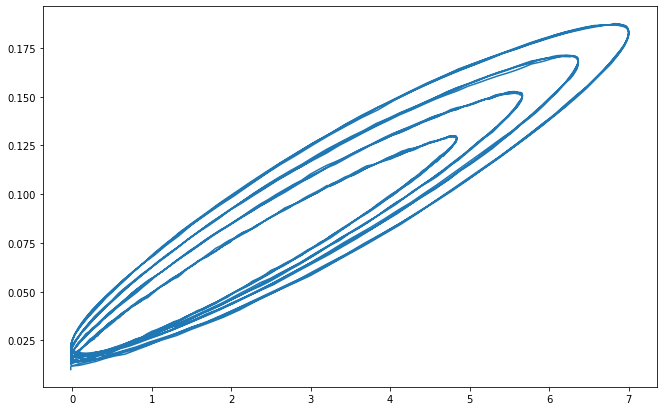

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-dd9c7b7bad94>", line 28, in <module>
    res = least_squares(fun, x0, args=(train_x, train_y))
NameError: name 'least_squares' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.

NameError: ignored

In [106]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

# Generate some dummy data for training
train_x = train_x
train_y = train_y
# Define the nonlinear function
def f(x, train_x):
    return (x[0]-x[1]*np.exp(-abs(train_x-(0))))*(train_x-(0))+x[2]*(train_x-(0))

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(x, train_x) - train_y
    return y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))

# Evaluate the function with the estimated parameter values
y_pred = f(res.x, train_x)

# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return (0.3623-0.9323*np.exp(-abs(t-(t-1))))*(t-(t-1))+0.0232*(t)

# Generate random parameter values
#x_true = np.random.normal(0, 1, size=3)
plt.plot(train_x, train_y, 'red', label='True data')
# Generate random time points
t = np.linspace(0.1, 1, 10)
v_t=1.5sin*0.5*
print (t)
# Generate random data
y = f(t)
# Plot the true data
plt.plot(t, y, 'green')
plt.show()


SyntaxError: ignored

In [ ]:
import math
v_t=1.5sin(0.5*t)+0.5sin(3*t)

In [61]:
import numpy as np
from scipy.misc import derivative
import math as m
t = np.linspace(0.1, 1, 10)
print(t)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [77]:
import numpy as np
from scipy.misc import derivative
import math as m
t = np.linspace(0.1, 1, 10)
print(t)
Constant=0.5
f_Xp=0.3
#class temp:
   # def _init_(self, t_array):
    #    self.t = t_array
    #def cal_v_t(self):
for t_i in t:
    V = (1.5*m.sin(0.5*t_i)+0.5*m.sin(3*t_i))
    deri_X = derivative(V, 1)
    print(deri_X,"  ", t)
         
    # if deri_X>0:
    #     v_t = 1.5*m.sin(0.5*t)+0.5*m.sin(3*t)
    #     f_x = (a-b*m.exp(v_t - Constant))*(v_t - Constant) + c*f_Xp
    #   elif deri_X<0:
    #     v_t = 1.5*m.sin(0.5*t)+0.5*m.sin(3*t)
    #         f_x = (a-b*m.exp(v_t - Constant))*(v_t - Constant) + c*f_Xp


#p1 = temp()
#p1.cal_v_t()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-7f82ede6171c>", line 14, in <module>
    deri_X = derivative(V, 1)
  File "/usr/local/lib/python3.8/dist-packages/scipy/misc/common.py", line 144, in derivative
    val += weights[k]*func(x0+(k-ho)*dx,*args)
TypeError: 'float' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/cor

TypeError: ignored

TypeError: ignored

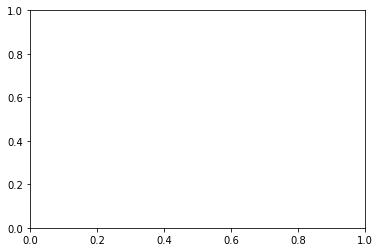

In [ ]:
plt.plot(p1,'green')
plt.show()